In [20]:
from aoc2024.grid_path_search import Grid

In [21]:
with open('../../data/day18-input.txt') as f:
    falling_bytes = []
    for line in f.readlines():
        parts = line.strip().split(',')
        x, y = parts
        falling_bytes.append((int(x), int(y)))


In [22]:

byte_index = {}
for b in falling_bytes[:1024]:
    byte_index[b] = b

grid_size = (71, 71)
grid_data = []
for y in range(grid_size[1]):
    row = []
    for x in range(grid_size[0]):
        if (x, y) in byte_index:
            row.append(1)
        else:
            row.append(0)
    grid_data.append(row)

grid = Grid()
grid.load_input(grid_data)
grid.start = grid.index[(0,0)]
grid.end = grid.index[(grid_size[0]-1, grid_size[1]-1)]
winning_actors, iteration = grid.start_walking()

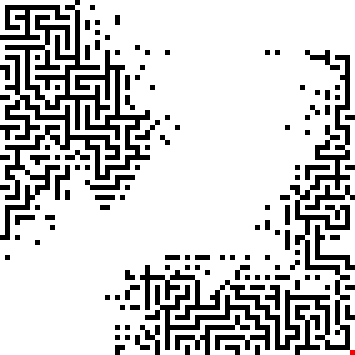

In [23]:
grid.visualize(winning_actors)

In [25]:
winning_actors = sorted(winning_actors, key=lambda a: len(a.previous))
print(len(winning_actors[0].previous) - 1)

308


### Part 2
Now, we just need to find which falling byte will block the route to the end position.
Iterate over the remaining blocks and run the pathfinder until there are no winning actors returned.
